# HR Analytics Project

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

# Load Data

In [2]:
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')

In [3]:
df_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
df_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


# Inspecting The Raw Data

In [5]:
[df_train.shape ,df_test.shape]

[(19158, 14), (2129, 13)]

In [6]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


In [8]:
df_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# Imputing Null values with mode value

In [9]:
df_train['gender'].fillna(value=df_train['gender'].mode(dropna=True)[0],inplace=True)
df_train['enrolled_university'].fillna(value=df_train['enrolled_university'].mode(dropna=True)[0],inplace=True)
df_train['education_level'].fillna(value=df_train['education_level'].mode(dropna=True)[0],inplace=True)
df_train['major_discipline'].fillna(value=df_train['major_discipline'].mode(dropna=True)[0],inplace=True)
df_train['experience'].fillna(value=df_train['experience'].mode(dropna=True)[0],inplace=True)
df_train['company_size'].fillna(value=df_train['company_size'].mode(dropna=True)[0],inplace=True)
df_train['company_type'].fillna(value=df_train['company_type'].mode(dropna=True)[0],inplace=True)
df_train['last_new_job'].fillna(value=df_train['last_new_job'].mode(dropna=True)[0],inplace=True)

In [10]:
df_train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# Data Visualization

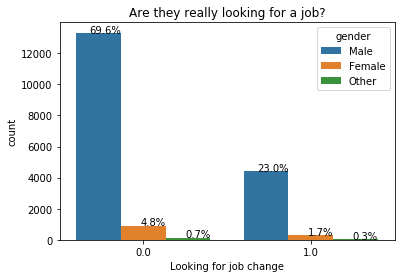

In [11]:
ax = sns.countplot(x="target",data=df_train, hue="gender")
total =float(len(df_train))

plt.title("Are they really looking for a job?")
plt.xlabel("Looking for job change")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

# Observation:

|-Around 25% people are lookging for a job change          -|

|-Out of which, 23% people are male                        -|

|-Around 75% people are currently not looking for job change-|


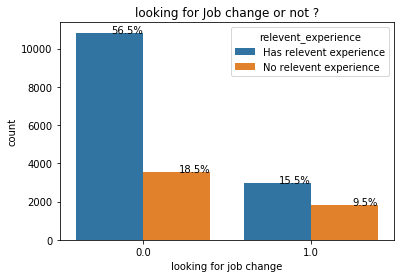

In [12]:
ax = sns.countplot(x="target",data=df_train, hue="relevent_experience")
total =float(len(df_train))

plt.title("looking for Job change or not ?")
plt.xlabel("looking for job change")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

# Observation:

|-Out of those who are looking for job change, 15.5 % have relevent experience.-|

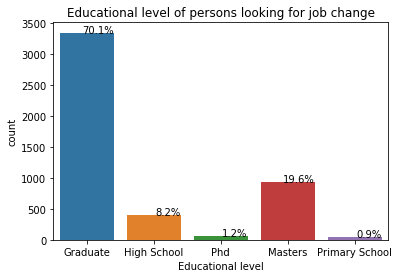

In [13]:
ax = sns.countplot(x="education_level",data=df_train[df_train['target']==1])
total_1 =float(len(df_train[df_train['target']==1]))
plt.title("Educational level of persons looking for job change")
plt.xlabel("Educational level")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

# Observation:

|-Graduates are more likely to look for a job change while other people included in any educational level are not-|

Text(0.5, 0, 'looking for job change')

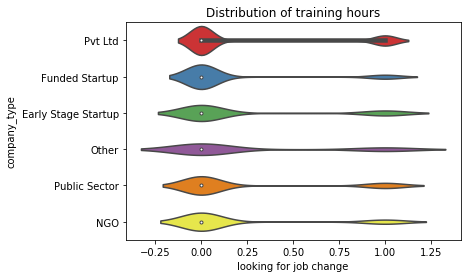

In [14]:
sns.violinplot(x='target',y="company_type",data=df_train,palette="Set1")
plt.title("Distribution of training hours")
plt.xlabel("looking for job change")

Text(0.5, 0, 'looking for job change')

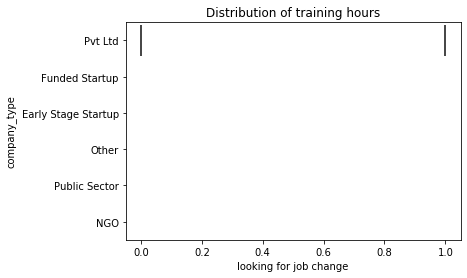

In [15]:
sns.violinplot(x=[df_train['target'] == 1],y="company_type",data=df_train,palette="Set1")
plt.title("Distribution of training hours")
plt.xlabel("looking for job change")

# Observation:
|-Company's type doesn't have a real impact on target-|

In [16]:
print(df_train['company_type'].value_counts())
print(df_train[df_train['target'] == 1]['company_type'].value_counts())

Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: company_type, dtype: int64
Pvt Ltd                4159
Public Sector           210
Early Stage Startup     142
Funded Startup          140
NGO                      97
Other                    29
Name: company_type, dtype: int64


Text(0.5, 0, 'looking for job change')

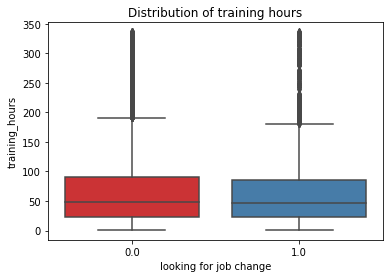

In [17]:
sns.boxplot(x="target",y="training_hours",data=df_train,palette="Set1")
plt.title("Distribution of training hours")
plt.xlabel("looking for job change")

# Observation:

|- Average training hours completed is almost same for people who are looking for job and not

It means training hours doesnt have impact here -|

Text(0.5, 0, 'looking for job change')

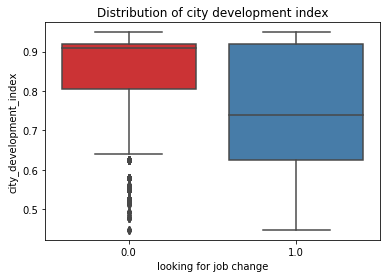

In [18]:
sns.boxplot(x="target",y="city_development_index",data=df_train,palette="Set1")
plt.title("Distribution of city development index")
plt.xlabel("looking for job change")

# Observation

|-Average city development index for people who are looking for job change is less. 

So, people from city which has higher development index are less likely to look for job change -|

Text(0.5, 1.0, 'looking for job change (major discipline wise)')

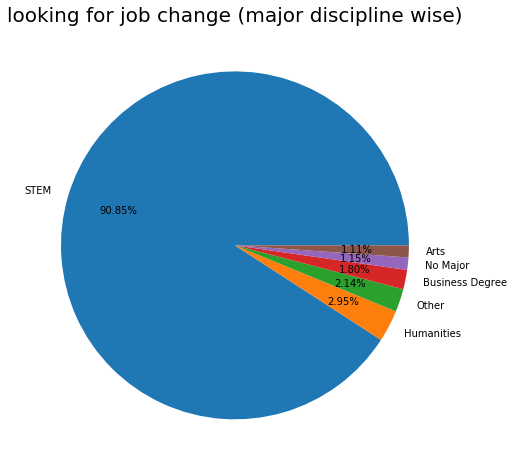

In [19]:
major_discipline = df_train[df_train['target'] == 1]['major_discipline']
values = major_discipline.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.7)
plt.title('looking for job change (major discipline wise)', fontsize=20)

# Observation:

Around 90% of STEM degree holders are looking fot job change. So, It might be possible that they are more likely to look for job changes

In [20]:
df_train['company_size'].unique().tolist()

['50-99',
 '<10',
 '10000+',
 '5000-9999',
 '1000-4999',
 '10/49',
 '100-500',
 '500-999']

In [21]:
df_train.loc[df_train['company_size'] == '<10', 'company_size'] = '10'
df_train.loc[df_train['company_size'] == '10/49', 'company_size'] = '30'
df_train.loc[df_train['company_size'] == '50-99', 'company_size'] = '75'
df_train.loc[df_train['company_size'] == '100-500', 'company_size'] = '300'
df_train.loc[df_train['company_size'] == '500-999', 'company_size'] = '750'
df_train.loc[df_train['company_size'] == '1000-4999', 'company_size'] = '3000'
df_train.loc[df_train['company_size'] == '5000-9999', 'company_size'] = '7500'
df_train.loc[df_train['company_size'] == '10000+', 'company_size'] = '10000'
df_train['company_size'] = df_train['company_size'].astype(int)

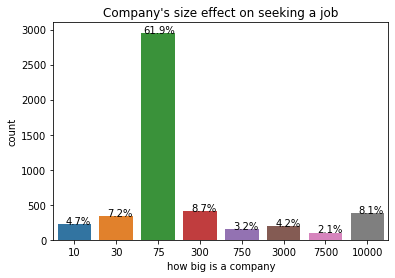

In [22]:
ax = sns.countplot(x="company_size",data=df_train[df_train['target']==1])
total_1 =float(len(df_train[df_train['target']==1]))
plt.title("Company's size effect on seeking a job")
plt.xlabel("how big is a company")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

# Observation:
|-The company with a range of employees between 50-100 are more likely to look for a new job while bigger and smaller companies are not-|

Text(0.5, 1.0, 'looking for job change (city wise)')

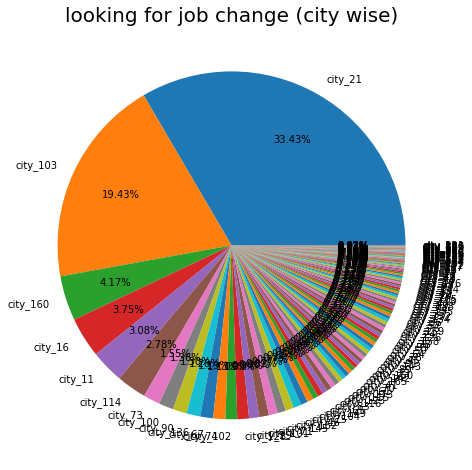

In [23]:
city = df_train[df_train['target'] == 1]['city']
values = city.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.7)
plt.title('looking for job change (city wise)', fontsize=20)

# Observation:
|-people in City_21 and City_103 are more likely to find another job , this might indicate for a bad work environment in these cities leading people to quit their jobs looking for other opportunities-|

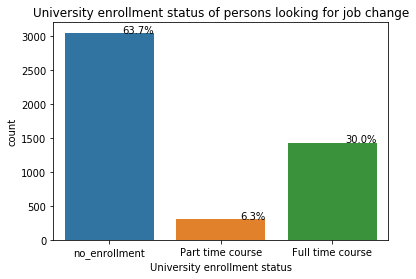

In [24]:
ax = sns.countplot(x="enrolled_university",data=df_train[df_train['target']==1])
total_1 =float(len(df_train[df_train['target']==1]))
plt.title("University enrollment status of persons looking for job change")
plt.xlabel("University enrollment status")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

# Observation:

Around 36% of people who are leaving the job are due to higher studies. 

Around 64% of the people havent enrolled in any educational courses. So, they might be leaving the job due to other reasons such as salary issues, job satisfaction, etc

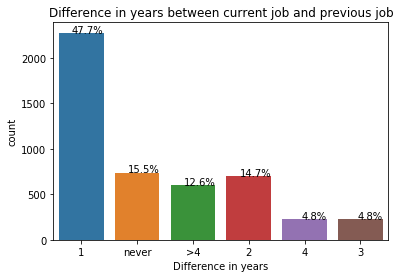

In [25]:
ax = sns.countplot(x="last_new_job",data=df_train[df_train['target']==1])
total_1 =float(len(df_train[df_train['target']==1]))
plt.title("Difference in years between current job and previous job")
plt.xlabel("Difference in years")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

# Observation:

Around 48 % of the people who are looking out for job change have only one year of difference between their current job and previus job. One of the possible reasons could be, they might not like the work culture of the company

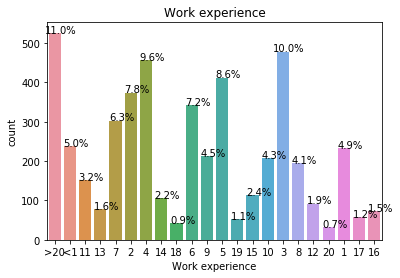

In [26]:

ax = sns.countplot(x="experience",data=df_train[df_train['target']==1])
total_1 =float(len(df_train[df_train['target']==1]))
plt.title("Work experience")
plt.xlabel("Work experience")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

# Observation

People with experience 2,3,4,5 and >20 are more likely to look for job change

# Data Preprocessing

In [27]:
#Encode experience column
df_train.loc[df_train['experience'] == '>20', 'experience'] = '21'
df_train.loc[df_train['experience'] == '<1', 'experience'] = '0'
df_train['experience'] = df_train['experience'].astype(int)

In [28]:
df_train['experience']

0        21
1        15
2         5
3         0
4        21
         ..
19153    14
19154    14
19155    21
19156     0
19157     2
Name: experience, Length: 19158, dtype: int32

In [29]:
df_train['last_new_job'].unique().tolist()

['1', '>4', 'never', '4', '3', '2']

In [30]:
#Encode difference between last and new job column
df_train.loc[df_train['last_new_job'] == 'never', 'last_new_job'] = '0'
df_train.loc[df_train['last_new_job'] == '>4', 'last_new_job'] = '5'
df_train['last_new_job'] = df_train['last_new_job'].astype(int)

In [31]:
#Encode gender
df_train.loc[df_train['gender'] == 'Male', 'gender'] = '2'
df_train.loc[df_train['gender'] == 'Female', 'gender'] = '1'
df_train.loc[df_train['gender'] == 'Other', 'gender'] = '0'
df_train['gender'] = df_train['gender'].astype(int)

In [32]:
#Encode enrolled_university
df_train.loc[df_train['enrolled_university'] == 'no_enrollment', 'enrolled_university'] = '2'
df_train.loc[df_train['enrolled_university'] == 'Full time course', 'enrolled_university'] = '1'
df_train.loc[df_train['enrolled_university'] == 'Part time course', 'enrolled_university'] = '0'
df_train['enrolled_university'] = df_train['enrolled_university'].astype(int)

In [33]:
df_train['major_discipline'].unique().tolist()

['STEM', 'Business Degree', 'Arts', 'Humanities', 'No Major', 'Other']

In [34]:
replace_map = {'major_discipline': {'STEM': 1, 'Business Degree': 2, 'Arts': 3, 'Humanities': 4,
                                  'No Major': 5, 'Other': 6}}

In [35]:
df_train.replace(replace_map, inplace=True)

In [36]:
df_train['education_level'].unique().tolist()

['Graduate', 'Masters', 'High School', 'Phd', 'Primary School']

In [37]:
replace_edu = {'education_level': {'Primary School': 1, 'Phd': 2, 'High School': 3, 'Masters': 4,
                                  'Graduate': 5}}
df_train.replace(replace_edu, inplace=True)

In [38]:
df_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,2,Has relevent experience,2,5,1,21,75,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,2,No relevent experience,2,5,1,15,75,Pvt Ltd,5,47,0.0
2,11561,city_21,0.624,2,No relevent experience,1,5,1,5,75,Pvt Ltd,0,83,0.0
3,33241,city_115,0.789,2,No relevent experience,2,5,2,0,75,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,2,Has relevent experience,2,4,1,21,75,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,2,No relevent experience,2,5,4,14,75,Pvt Ltd,1,42,1.0
19154,31398,city_103,0.920,2,Has relevent experience,2,5,1,14,75,Pvt Ltd,4,52,1.0
19155,24576,city_103,0.920,2,Has relevent experience,2,5,1,21,75,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,2,Has relevent experience,2,3,1,0,750,Pvt Ltd,2,97,0.0


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    19158 non-null int32
relevent_experience       19158 non-null object
enrolled_university       19158 non-null int32
education_level           19158 non-null int64
major_discipline          19158 non-null int64
experience                19158 non-null int32
company_size              19158 non-null int32
company_type              19158 non-null object
last_new_job              19158 non-null int32
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int32(5), int64(4), object(3)
memory usage: 1.7+ MB


In [40]:
corr_mat = df_train.corr()
#print(corr_mat)
corr_mat['target']

enrollee_id               0.049475
city_development_index   -0.341665
gender                   -0.008529
enrolled_university      -0.103148
education_level           0.088760
major_discipline         -0.007378
experience               -0.174256
company_size             -0.072597
last_new_job             -0.084607
training_hours           -0.021577
target                    1.000000
Name: target, dtype: float64

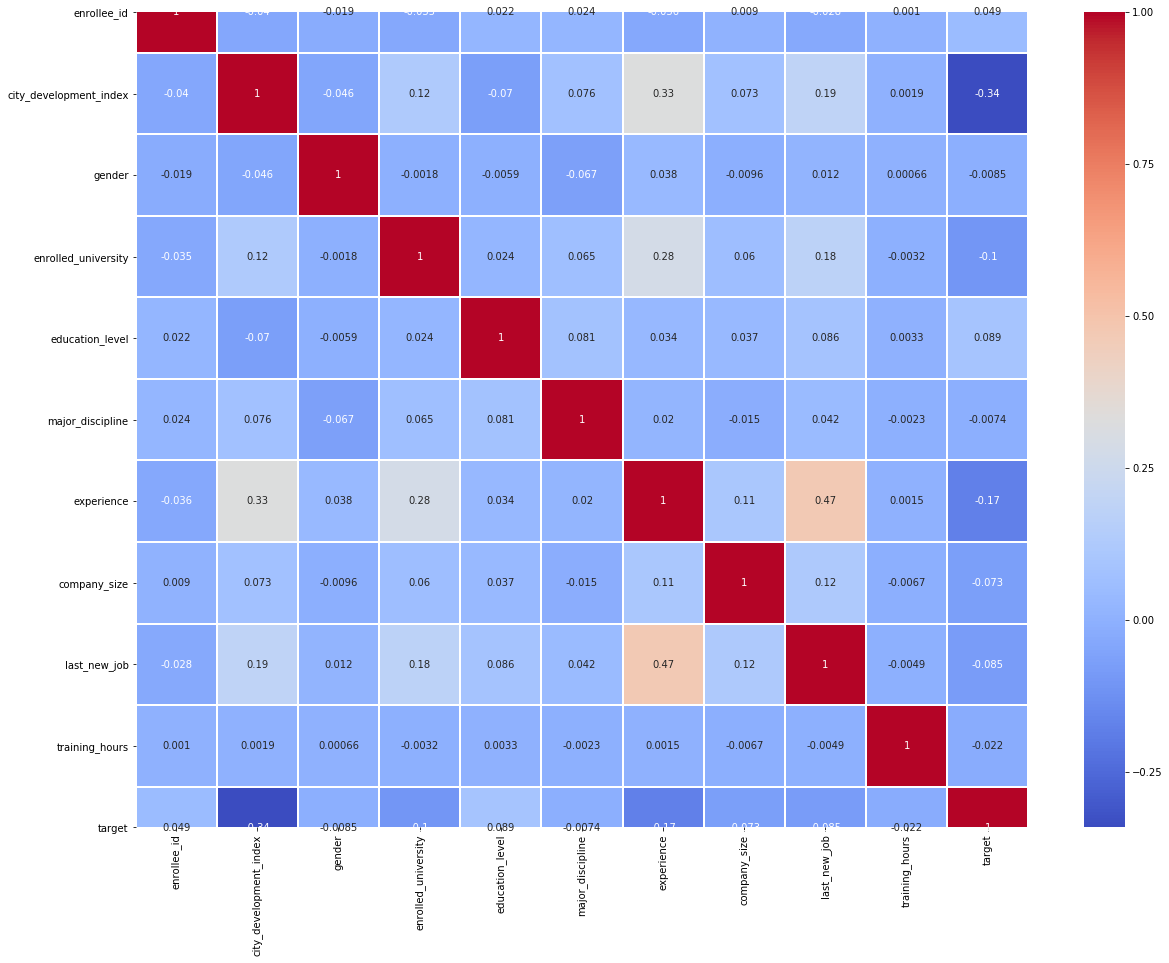

In [41]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), linecolor = 'white', linewidths = 1, cmap = 'coolwarm', annot = True)
plt.show()

In [42]:
rel_exp = pd.get_dummies(df_train['relevent_experience'], drop_first = True)
city = pd.get_dummies(df_train['city'], drop_first = True)
comp_type = pd.get_dummies(df_train['company_type'], drop_first = True)

In [43]:
df_train.drop(['relevent_experience', 'city' ,'company_type'], axis=1 , inplace = True)


In [44]:
train = pd.concat([rel_exp, city, comp_type, df_train], axis = 1)

In [45]:
df_train.set_index('enrollee_id' , inplace = True)

In [46]:
df_train

,city_development_index,gender,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,
8949,0.920,2,2,5,1,21,75,1,36,1.0
29725,0.776,2,2,5,1,15,75,5,47,0.0
11561,0.624,2,1,5,1,5,75,0,83,0.0
33241,0.789,2,2,5,2,0,75,0,52,1.0
666,0.767,2,2,4,1,21,75,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...
7386,0.878,2,2,5,4,14,75,1,42,1.0
31398,0.920,2,2,5,1,14,75,4,52,1.0
24576,0.920,2,2,5,1,21,75,4,44,0.0


# Train Model

In [49]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Using variant ML algorithms

In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 300)
log.fit(X_train, y_train)

C:\Users\afnan\Anaconda3 (64-bit)\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Logistic Regression Accuracy Score

In [51]:
y_pred_log = log.predict(X_test)
print("The Accuracy Score of Logistic Regression is: {}%".format(accuracy_score(y_test, y_pred_log)*100))
print("The Confusion Matrix for Logistic Regression is: \n{}\n".format(confusion_matrix(y_test, y_pred_log)))
print('\n')
print(classification_report(y_test, y_pred_log))

The Accuracy Score of Logistic Regression is: 76.70146137787056%
The Confusion Matrix for Logistic Regression is: 
[[3418  184]
 [ 932  256]]



              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      3602
         1.0       0.58      0.22      0.31      1188

    accuracy                           0.77      4790
   macro avg       0.68      0.58      0.59      4790
weighted avg       0.74      0.77      0.72      4790



In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

# Decision Tree Accuracy Score

In [53]:
y_pred_dt = dt.predict(X_test)
print("The Accuracy Score of Decision Tree is: {}%".format(accuracy_score(y_test, y_pred_dt)*100))
print("The Confusion Matrix for Decision Tree is: \n{}\n".format(confusion_matrix(y_test, y_pred_dt)))
print('\n')
print(classification_report(y_test, y_pred_dt))

The Accuracy Score of Decision Tree is: 68.93528183716076%
The Confusion Matrix for Decision Tree is: 
[[2849  753]
 [ 735  453]]



              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      3602
         1.0       0.38      0.38      0.38      1188

    accuracy                           0.69      4790
   macro avg       0.59      0.59      0.59      4790
weighted avg       0.69      0.69      0.69      4790



In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Random Forest Classifier Accuracy Score

In [55]:
y_pred_rf = rf.predict(X_test)
print("The Accuracy Score of Random Forest is: {}%".format(accuracy_score(y_test, y_pred_rf)*100))
print("The Confusion Matrix for Random Forest is: \n{}\n".format(confusion_matrix(y_test, y_pred_rf)))
print('\n')
print(classification_report(y_test, y_pred_rf))

The Accuracy Score of Random Forest is: 76.17954070981212%
The Confusion Matrix for Random Forest is: 
[[3210  392]
 [ 749  439]]



              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      3602
         1.0       0.53      0.37      0.43      1188

    accuracy                           0.76      4790
   macro avg       0.67      0.63      0.64      4790
weighted avg       0.74      0.76      0.75      4790



# Preprocessing New Test Data

In [56]:
df_test.set_index('enrollee_id' , inplace = True)

In [57]:
df_test

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
enrollee_id,,,,,,,,,,,,
32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18


In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 32403 to 12215
Data columns (total 12 columns):
city                      2129 non-null object
city_development_index    2129 non-null float64
gender                    1621 non-null object
relevent_experience       2129 non-null object
enrolled_university       2098 non-null object
education_level           2077 non-null object
major_discipline          1817 non-null object
experience                2124 non-null object
company_size              1507 non-null object
company_type              1495 non-null object
last_new_job              2089 non-null object
training_hours            2129 non-null int64
dtypes: float64(1), int64(1), object(10)
memory usage: 216.2+ KB


In [59]:
df_test.loc[666]

KeyError: 666

In [60]:
df_train.loc[666]

city_development_index     0.767
gender                     2.000
enrolled_university        2.000
education_level            4.000
major_discipline           1.000
experience                21.000
company_size              75.000
last_new_job               4.000
training_hours             8.000
target                     0.000
Name: 666, dtype: float64

# Observation:
|-The test Data is not a slicing from the train Data they are different-|

In [61]:
df_test.isna().sum()

city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [62]:
#Imputing Null values with mean value
df_test['gender'].fillna(value=df_test['gender'].mode(dropna=True)[0],inplace=True)
df_test['enrolled_university'].fillna(value=df_test['enrolled_university'].mode(dropna=True)[0],inplace=True)
df_test['education_level'].fillna(value=df_test['education_level'].mode(dropna=True)[0],inplace=True)
df_test['major_discipline'].fillna(value=df_test['major_discipline'].mode(dropna=True)[0],inplace=True)
df_test['experience'].fillna(value=df_test['experience'].mode(dropna=True)[0],inplace=True)
df_test['company_size'].fillna(value=df_test['company_size'].mode(dropna=True)[0],inplace=True)
df_test['company_type'].fillna(value=df_test['company_type'].mode(dropna=True)[0],inplace=True)
df_test['last_new_job'].fillna(value=df_test['last_new_job'].mode(dropna=True)[0],inplace=True)

In [63]:
df_test.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [64]:
#Encode experience column
df_test.loc[df_test['experience'] == '>20', 'experience'] = '21'
df_test.loc[df_test['experience'] == '<1', 'experience'] = '0'
df_test['experience'] = df_test['experience'].astype(int)

#Encode for company_size

df_test.loc[df_test['company_size'] == '<10', 'company_size'] = '10'
df_test.loc[df_test['company_size'] == '10/49', 'company_size'] = '30'
df_test.loc[df_test['company_size'] == '50-99', 'company_size'] = '75'
df_test.loc[df_test['company_size'] == '100-500', 'company_size'] = '300'
df_test.loc[df_test['company_size'] == '500-999', 'company_size'] = '750'
df_test.loc[df_test['company_size'] == '1000-4999', 'company_size'] = '3000'
df_test.loc[df_test['company_size'] == '5000-9999', 'company_size'] = '7500'
df_test.loc[df_test['company_size'] == '10000+', 'company_size'] = '10000'
df_test['company_size'] = df_test['company_size'].astype(int)

#Encode difference between last and new job column
df_test.loc[df_test['last_new_job'] == 'never', 'last_new_job'] = '0'
df_test.loc[df_test['last_new_job'] == '>4', 'last_new_job'] = '5'
df_test['last_new_job'] = df_test['last_new_job'].astype(int)

#Encode gender
df_test.loc[df_test['gender'] == 'Male', 'gender'] = '2'
df_test.loc[df_test['gender'] == 'Female', 'gender'] = '1'
df_test.loc[df_test['gender'] == 'Other', 'gender'] = '0'
df_test['gender'] = df_test['gender'].astype(int)

#Encode enrolled_university
df_test.loc[df_test['enrolled_university'] == 'no_enrollment', 'enrolled_university'] = '2'
df_test.loc[df_test['enrolled_university'] == 'Full time course', 'enrolled_university'] = '1'
df_test.loc[df_test['enrolled_university'] == 'Part time course', 'enrolled_university'] = '0'
df_test['enrolled_university'] = df_test['enrolled_university'].astype(int)

#Encode major_discipline
replace_map = {'major_discipline': {'STEM': 1, 'Business Degree': 2, 'Arts': 3, 'Humanities': 4,
                                  'No Major': 5, 'Other': 6}}
df_test.replace(replace_map, inplace=True)
#Encode education_level

replace_edu = {'education_level': {'Primary School': 1, 'Phd': 2, 'High School': 3, 'Masters': 4,
                                  'Graduate': 5}}
df_test.replace(replace_edu, inplace=True)

In [65]:
df_test.drop(['relevent_experience' , 'city' ,'company_type'], axis=1 , inplace = True)


In [66]:
[df_train.shape ,df_test.shape]

[(19158, 10), (2129, 9)]

In [67]:
df_test

,city_development_index,gender,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours
enrollee_id,,,,,,,,,
32403,0.827,2,1,5,1,9,10,1,21
9858,0.920,1,2,5,1,5,75,1,98
31806,0.624,2,2,3,1,0,75,0,15
27385,0.827,2,2,4,1,11,30,1,39
27724,0.920,2,2,5,1,21,10000,5,72
...,...,...,...,...,...,...,...,...,...
1289,0.920,2,2,5,4,16,75,4,15
195,0.897,2,2,4,1,18,75,2,30
31762,0.887,2,2,1,1,3,75,0,18


# Applying Models on New Test Data

In [68]:
X = df_test.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

# Model Accurcy for The New Data using Decision Tree

In [70]:
y_pred_dt2 = dt.predict(X_test)
print("The Accuracy Score of Decision Tree is: {}%".format(accuracy_score(y_test, y_pred_dt2)*100))
print("The Confusion Matrix for Decision Tree is: \n{}\n".format(confusion_matrix(y_test, y_pred_dt2)))
print('\n')
print(classification_report(y_test, y_pred_dt2))

The Accuracy Score of Decision Tree is: 68.93528183716076%
The Confusion Matrix for Decision Tree is: 
[[2849  753]
 [ 735  453]]



              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      3602
         1.0       0.38      0.38      0.38      1188

    accuracy                           0.69      4790
   macro avg       0.59      0.59      0.59      4790
weighted avg       0.69      0.69      0.69      4790



In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Model Accurcy for The New Data using Random Forest

In [72]:
y_pred_rf2 = rf.predict(X_test)
print("The Accuracy Score of Random Forest is: {}%".format(accuracy_score(y_test, y_pred_rf2)*100))
print("The Confusion Matrix for Random Forest is: \n{}\n".format(confusion_matrix(y_test, y_pred_rf2)))
print('\n')
print(classification_report(y_test, y_pred_rf2))

The Accuracy Score of Random Forest is: 76.1169102296451%
The Confusion Matrix for Random Forest is: 
[[3203  399]
 [ 745  443]]



              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      3602
         1.0       0.53      0.37      0.44      1188

    accuracy                           0.76      4790
   macro avg       0.67      0.63      0.64      4790
weighted avg       0.74      0.76      0.75      4790



# Comparing accurcy between old and new Data to evaluate the Model performance

In [73]:
[accuracy_score(y_test, y_pred_rf)*100 , accuracy_score(y_test, y_pred_rf2)*100]

[76.17954070981212, 76.1169102296451]

In [74]:
[accuracy_score(y_test, y_pred_dt)*100 , accuracy_score(y_test, y_pred_dt2)*100]

[68.93528183716076, 68.93528183716076]

# Final Comments :

# 1- Males are more often to look for a job change yet they are also the higher number in not looking for  job change so this might only be due to population in the Area or culture of women not working , HR must look into these considerations.

# 2- The more developed the city is, The more it provides better job opportunities so people don't change jobs often.

# 3- Most people looking for a job change are from some speicifc cities like city_21 and city_103 , these cities might have an abusive work environment for the emolyees.

# 4- Companies with avr num of employees [50-100] are more likely to be left , This indicates that whether people prefer working for bigger companies or having their own startups which is related to smaller companies.

# 5- Educational level indicates that graduatees are more likely to change their jobs than people engaged in higher studies or still undergradaute.

# 6- STEM degrees are college programs in science, technology, engineering and mathematics. STEM degrees have seen increasing demand in jobs for the last decade. That's why they're more likely to change jobs looking for better opportunities.

# 7- People with only a year experience are more often to change jobs ; this indicates to possibilities of: a - they got engaged in a temporarily job that doesn't suit their goals just for an initial experience , b- They are not used to or can't meet the needed work requirments , c- Companies get advantage of fresh people in the working field for their own profit without a fair return so people quit.

# Thank You.